$$ \textbf{Задание 1} $$
$$ \textbf{Богданов Александр} $$

In [47]:
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from scipy import stats
import random

$\textbf{Задача 1 (10 баллов).}$ Пусть проводится эксперимент по угадыванию стороны выпадания честной монеты. Известно, что оракул прав с вероятностью $p_1 = 0.9$, а обычный человек с вероятностью $p_2 = 0.5$. Известно, что человек $P$ оказался прав во всех $n = 10$ бросаниях. С какой вероятностью $P$ является оракулом, если случайные человек оказывается оракулом с вероятностью $p_{oracle} = 10^{−4}$ (3 балла)? 

Пусть человек $P$ выбран не случайно, а как лучший среди 100 человек по угадыванию $k = 100$ выпадений монеты. Вывести новую априорную вероятность того, что $P$ оракул с учётом его неслучайного выбора (7 баллов).
1. аналитически (приближенно) для случая k >> 1;
2. сэмплированием для значений k от 1 до 1000. Построить график для разных k.

$\textbf{Решение:}$

а) Пусть $X$ - человек является оракулом, $Y$ - человек прав в n случаях. $\mathbb{P}\{X\} = p_{oracle}$, тогда:

$$\mathbb{P}\{X | Y\} = \frac{\mathbb{P}\{Y | X\} \mathbb{P}\{X\}}{\mathbb{P}\{Y\}} = \frac{\mathbb{P}\{Y | X\} \mathbb{P}\{X\}}{\mathbb{P}\{Y | X\} \mathbb{P}\{X\} + \mathbb{P}\{Y | \overline{X}\} \mathbb{P}\{\overline{X}\}} = \frac{p_1^n p_{oracle}}{p_1^n p_{oracle} + p_2^n (1 - p_{oracle})} = \frac{0.9^{10} \cdot 10^{-4}}{0.9^{10} \cdot 10^{-4} + 0.5^{10} \cdot (1 - 10^{-4})} \approx 0.0345$$

б)
1. Пусть $Z$ - человек стал лучшим среди 100 человек. Разложим $\mathbb{P}\{X | Z\}$ по $\xi$ - количеству оракулов среди 100 человек. Тогда:

$$\mathbb{P}\{X | Z\} = \sum\limits_{i = 1}^{100} \mathbb{P}\{X | Z, \xi = i\} \mathbb{P}\{\xi = i\},\ \text{причем}$$

$$\mathbb{P}\{\xi = i\} = C_k^i p_{oracle}^i (1 - p_{oracle})^{k - i}$$

Посмотрим на значения  $\mathbb{P}\{\xi = i\}:$

$$\mathbb{P}\{\xi = 0\} = 0.99,\ \mathbb{P}\{\xi = 1\} = 0.0099,\ \mathbb{P}\{\xi = 2\} = 0.000049$$

Заметим, что $\mathbb{P}\{X | Z, \xi = 0\} = 0$, так как это эквивалентно: "Человек являтся оракулом при условии, что он стал лучшим среди 100 человек и что оракулов среди этих 100 человек - 0". 

Распишем $\mathbb{P}\{X | Z, \xi = 1\}$:

$$\mathbb{P}\{X | Z, \xi = 1\} = \frac{\mathbb{P}\{Z | X, \xi = 1\} \mathbb{P}\{X, \xi = 1\}}{\mathbb{P}\{Z, \xi = 1\}} = \frac{\mathbb{P}\{Z | X, \xi = 1\} \mathbb{P}\{X, \xi = 1\}}{\mathbb{P}\{Z | X, \xi = 1\} \mathbb{P}\{X, \xi = 1\} + \mathbb{P}\{Z | \overline{X}, \xi = 1\} \mathbb{P}\{\overline{X}, \xi = 1\}}$$

Заметим, что $\mathbb{P}\{Z | \overline{X}, \xi = 1\} \approx 0$, так как это эквивалентно: "Человек стал лучшим среди 100 человек, при условии, что он не оракул и что среди этих 100 человек есть оракул". Тогда $\mathbb{P}\{X | Z, \xi = 1\} \approx 1$.

Тогда $\mathbb{P}\{X | Z\}$ можно оценить так:

$$\mathbb{P}\{X | Z\} = \mathbb{P}\{X | Z, \xi = 1\} \mathbb{P}\{\xi = 1\} \approx 0.01 \Rightarrow \mathbb{P}_Z\{X\} = \mathbb{P}\{X | Z\}$$

Тогда:

$$\mathbb{P}\{X | Y\} = \frac{\mathbb{P}\{Y | X\} \mathbb{P}_Z\{X\}}{\mathbb{P}\{Y\}} = \frac{\mathbb{P}\{Y | X\} \mathbb{P}_Z\{X\}}{\mathbb{P}\{Y | X\} \mathbb{P}_Z\{X\} + \mathbb{P}\{Y | \overline{X}\} \mathbb{P}_Z\{\overline{X}\}} = \frac{p_1^n \mathbb{P}_Z\{X\}}{p_1^n \mathbb{P}_Z\{X\} + p_2^n (1 - \mathbb{P}_Z\{X\})} = \frac{0.9^{10} \cdot 0.01}{0.9^{10} \cdot 0.01 + 0.5^{10} \cdot (1 - 0.01)} \approx 0.783$$

2. Будем проводить $N = 10000$ экспериментов для каждого $k$:

In [71]:
frequency = []
N = 10000

for k in trange(1, 1001, colour='green'):
    number_oracle = 0
    for _ in range(N):
        people = np.random.binomial(1, 1e-4, 100)
        number_true = []
        for i in range(100):
            number_true.append([1, np.random.binomial(k, 0.9)] if people[i]
                                 else [0, np.random.binomial(k, 0.5)])
        number_oracle += max(number_true, key = lambda x:x[1])[0]
    frequency.append(number_oracle / N)

100%|███████████████████████████████████████| 1000/1000 [53:45<00:00,  3.23s/it]


In [72]:
print(f"Сэмплированная вероятность P_Z(X) : {np.array(frequency).mean():.2}")

Сэмплированная вероятность P_Z(X) : 0.0099


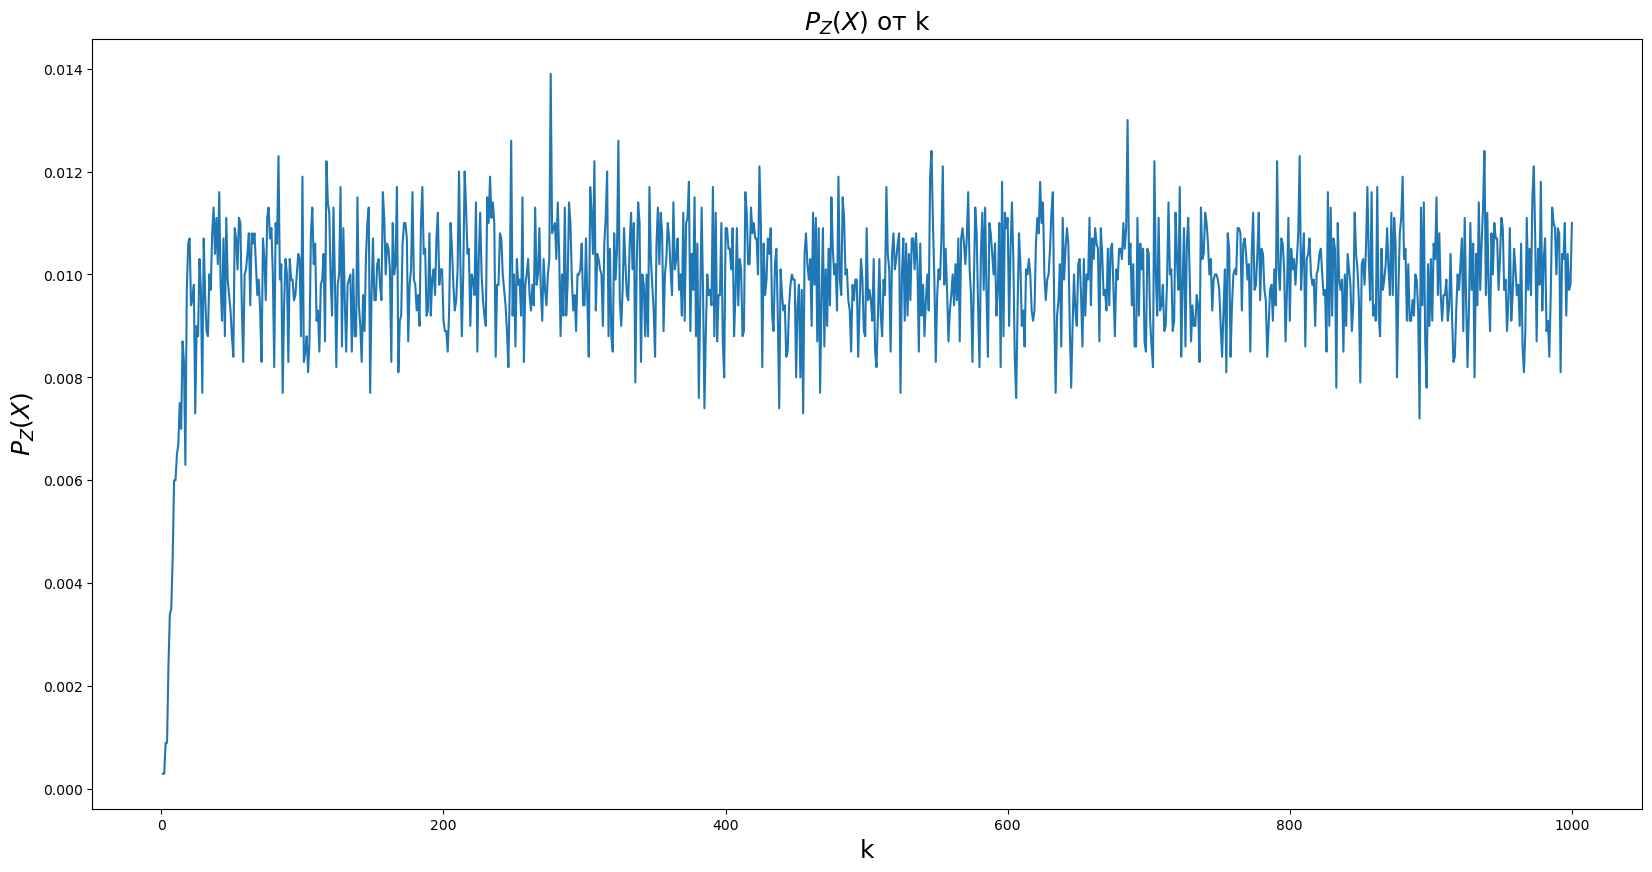

In [73]:
plt.figure(figsize = (20, 10))
plt.plot(range(1, 1001), frequency)
plt.title("$P_Z(X)$ от k", fontsize = 18)
plt.xlabel("k", fontsize = 18)
plt.ylabel("$P_Z(X)$", fontsize = 18)
plt.show()

$\textbf{Вывод}:$
1. При случайном выборе: $\mathbb{P}\{X | Y\} = 0.0345$
2. При не случайном выборе: $\mathbb{P}\{X | Y\} = 0.783$. Причем практическая оценка колеблется около теоретической. Для уменьшения колебанй надо увеличивать N.

$\textbf{Задача 2 (10 баллов).}$ Пусть имеется НОР выборка $\{x_1, \dots, x_n\}$ из неизвестного раcпределения с конечной плотностью. На уровне значимости $\alpha = 0.05$ проверить гипотезу о том, что десятипроцентная квантиль этого распределения равна $m_0 = 0$.

$\textbf{Решение:}$

Рассматривается гиптеза:

$$H_0 : F(m_0) = 0.1$$

Рассмотрим эмперическую функцию распределения:

$$\hat{F}(x) = \frac{1}{n} \sum\limits_{i = 0}^n I(x_i < x)$$

Рассмотрим статистику:

$$T(\mathbf{X}) = \hat{F}(m_0) - F(m_0) = \frac{1}{n} \sum\limits_{i = 0}^n I(x_i < 0) - 0.1$$

Учтем, что:

$$n\hat{F}(x) \sim Be(n, F(x)) \underset{n \to \infty}{\overset{d}{\longrightarrow}} N(nF(x), nF(x)(1 - F(x))$$

Тогда:

$$T(X) \sim \frac{1}{n} N(0.1n, 0.09n) - 0.1 = N \left(0, \frac{0.09}{n} \right)$$

В качестве критической области возьмем: $|T(X)| > t_{\alpha}$, где $t_{\alpha} = N_{1 - \frac{\alpha}{2}} \left(0, \frac{0.09}{n} \right)$, можно считать, что $t_{\alpha} = 2 \sigma = \frac{3}{5 \sqrt{n}}$ (Так как в $2 \sigma - 95 \%$ значений).

Таким образом $H_0$ отвергается $\Leftrightarrow |T(X)| > t_{\alpha},\ t_{\alpha} = \frac{3}{5 \sqrt{n}}$

$\textbf{Задача 3 (25 + 10 баллов).}$ Пусть имеется выборка пар $\mathbf{z_i} = (x_i, y_i),\ i = \overline{1, \dots, n}$, 

$$ \mathbf{z}_i \sim N \left( \mathbf{z}_i \ | \ (0, 0)^\top, \begin{pmatrix}     1 & \rho \\ 
                                                                               \rho & 1
                                                               \end{pmatrix}
                                                                                       \right). $$

Гипотеза: $H_0: \rho = 0$

Для статистики $T_1(\mathbf{Z}) = \frac{1}{n} \sum\limits_{i = 1}^{n} x_i y_i$:

1. получить распределение для разных значений $\rho$ и нарисовать плотность для $\rho = 0$ и $\rho = 0.5$ для $n = 100$ (2 балла);

2. построить критерий для проверки гипотезы $\rho = 0$ на уровне значимости $\alpha = 0.05$ (3 балла);

3. получить зависимость мощности данного критерия от истинного $\rho$ сэмплированием (5 баллов) и приближенно аналитически (5 баллов), и предложить форму (3 балла) зависимости мощности критерия от $n$ и $\rho$.

4. Сравнить мощность (7 баллов) в зависимости от $\rho$ со статистикой $T_2(\mathbf{Z}) = \frac{1}{2n} \sum\limits_{i = 1}^{n} (x_i - y_i)^2$, рассмотренной на лекции.

Какую статистику вы предложили бы для использования на практике? (+10 баллов тому, кто предложит свою и аргументированно обоснует, что она лучше).

$\textbf{Решение:}$

1. Посчитаем математическое ожидание и дисперсию $x_i y_i$ (будем считать, что $x_i y_i$ - независимы):

$$\mathbb{E}(x_i y_i) = \rho = \mu$$

$$\mathbb{E}(x_i y_i)^2 = \mathbb{D}(x_i)\mathbb{D}(y_i) + 2 \mathbb{E}^2(x_i y_i) = 1 + 2 \rho^2$$

$$\mathbb{D}(x_i y_i) = \mathbb{E}(x_i y_i)^2 - \mathbb{E}^2(x_i y_i) = 1 + \rho^2 = \sigma^2$$

Воспользуемся центральной предельной теоремой:

$$\sqrt{n} \frac{T_1(\mathbf{Z}) - \mu}{\sigma} \underset{n \to \infty}{\overset{d}{\longrightarrow}} N(0, 1) \Rightarrow T_1(\mathbf{Z}) \sim N \left( \mu, \frac{\sigma^2}{n} \right) = N \left( \rho, \frac{1 + \rho^2}{n} \right)$$

Нарисуем плотность:

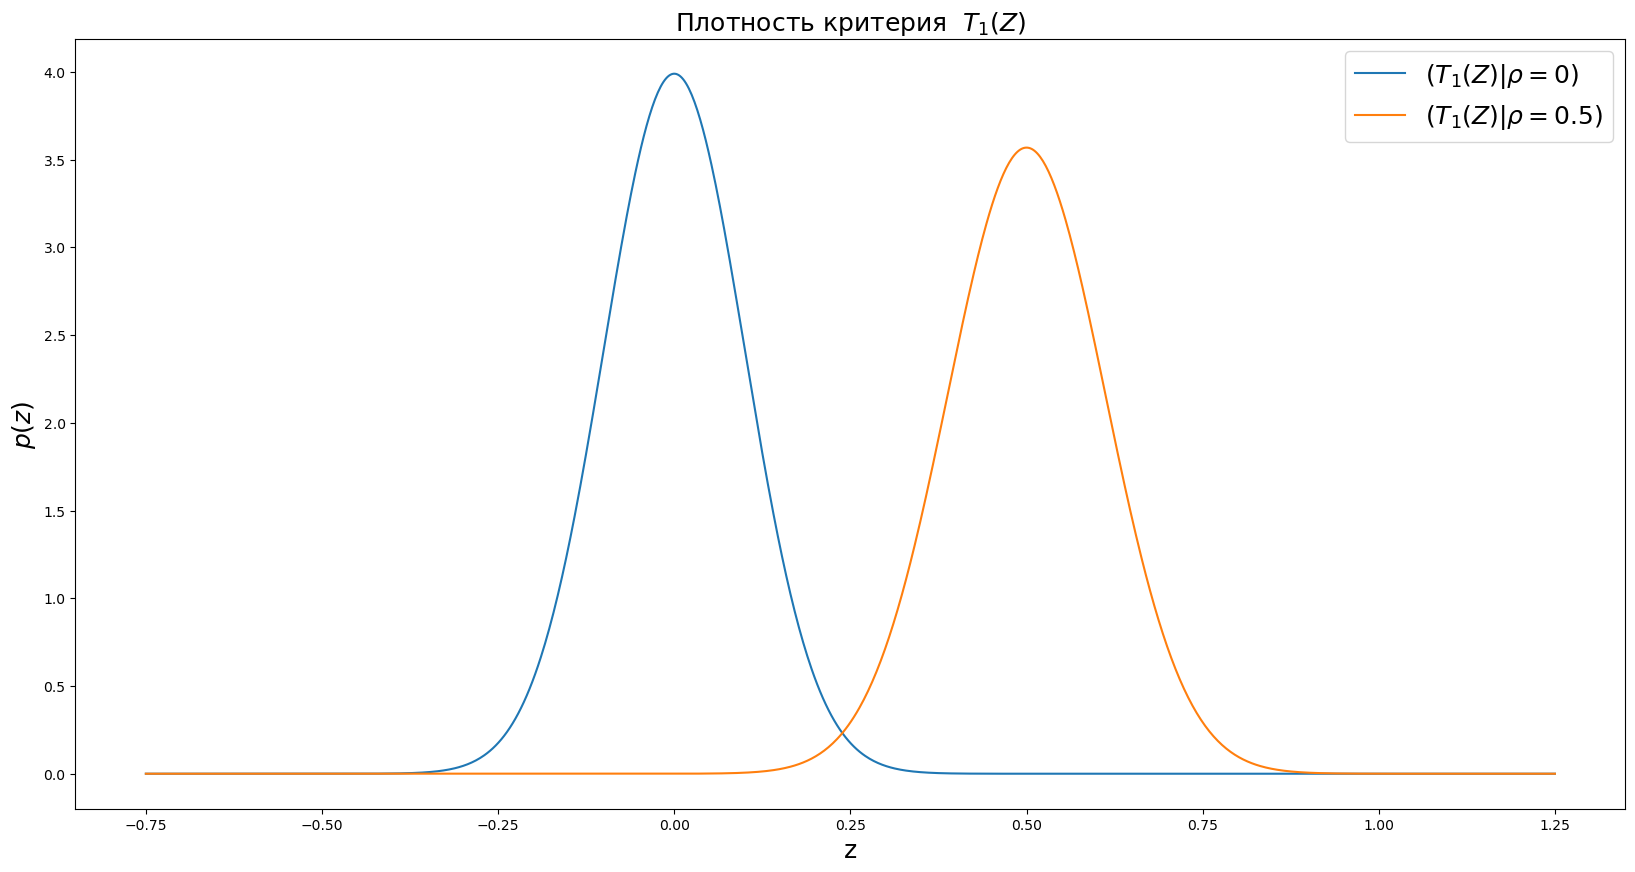

In [130]:
plt.figure(figsize = (20, 10))

steps = np.linspace(-0.75, 1.25, 1000)

plt.plot(steps, stats.norm.pdf(steps, 0  , np.sqrt(1 / 100))           , label = "$(T_1(Z)| \\rho = 0)$")
plt.plot(steps, stats.norm.pdf(steps, 0.5, np.sqrt((1 + 0.5**2) / 100)), label = "$(T_1(Z)| \\rho = 0.5)$")

plt.title("Плотность критерия  $T_1(Z)$", fontsize = 18)
plt.xlabel("z", fontsize = 18)
plt.ylabel("$p(z)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

2. Построим критерий:

В качестве критической области возьмем: $|T_1(\mathbf{Z})| > t_{\alpha}$, где $t_{\alpha} = N_{1 - \frac{\alpha}{2}} \left(0, \frac{1}{n} \right)$, можно считать, что $t_{\alpha} = 2 \sigma = \frac{2}{\sqrt{n}}$ (Так как в $2 \sigma - 95 \%$ значений).

Таким образом $H_0$ отвергается $\Leftrightarrow |T_1(\mathbf{Z})| > t_{\alpha},\ t_{\alpha} = \frac{2}{\sqrt{n}}$

3. Зависимость мощности критерия от истинного $\rho$ сэмплированием:

In [115]:
def sampling_power_1(N, n, rho):
    
    k = 0
    for i in range(N):
        
        T = 1 / n * np.sum([x * y for x, y in 
                            np.random.multivariate_normal([0,0], [[1, rho], [rho, 1]], n)]) 
        
        if (np.abs(T) >= 2 / np.sqrt(n)):
            k += 1
            
    return k / N

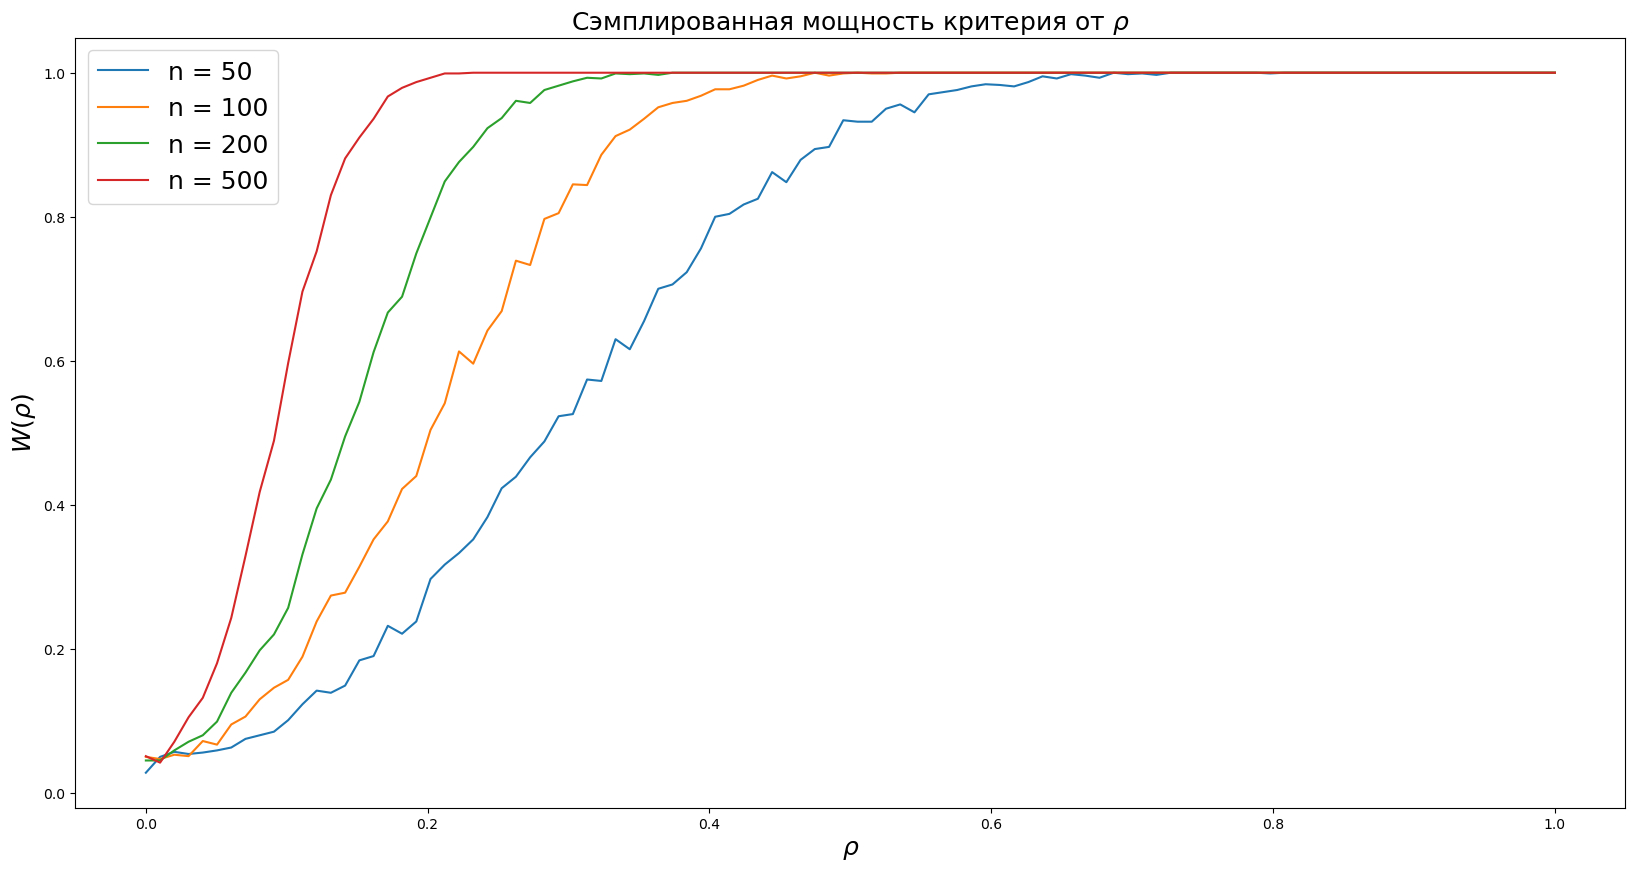

In [121]:
plt.figure(figsize = (20, 10))

rhos = np.linspace(0, 1, 100)

plt.plot(rhos, [sampling_power_1(1000, 50, rho) for rho in rhos], label = 'n = 50' )
plt.plot(rhos, [sampling_power_1(1000, 100, rho)  for rho in rhos], label = 'n = 100')
plt.plot(rhos, [sampling_power_1(1000, 200, rho) for rho in rhos], label = 'n = 200')
plt.plot(rhos, [sampling_power_1(1000, 500, rho) for rho in rhos], label = 'n = 500')

plt.title("Сэмплированная мощность критерия от $\\rho$", fontsize = 18)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Зависимость мощности критерия от истинного $\rho$ аналитически:

$$W(n) = \int\limits_{-\infty}^{-\frac{2}{\sqrt{n}}} f_{T_1(\mathbf{Z})}(t) dt + \int\limits^{+\infty}_{\frac{2}{\sqrt{n}}} f_{T_1(\mathbf{Z})}(t) dt = F_{T_1(\mathbf{Z})} \left( -\frac{2}{\sqrt{n}} \right) + 1 - F_{T_1(\mathbf{Z})} \left( \frac{2}{\sqrt{n}} \right)$$

С учетом того, что $F_{T_1(\mathbf{Z})}(z) = \Phi \left( \sqrt{n} \dfrac{z - \mu}{\sigma} \right)$ получаем:

$$W(n, \rho) = \Phi \left( \frac{-2 - \rho \sqrt{n}}{\sqrt{1 + \rho^2}} \right) + 1 - \Phi \left( \frac{2 - \rho \sqrt{n}}{\sqrt{1 + \rho^2}} \right)$$

In [122]:
def analytical_power_1(n, rho):
    return stats.norm.cdf((-2 - rho * np.sqrt(n)) / np.sqrt(1 + rho**2)) + 1 - stats.norm.cdf((2 - rho * np.sqrt(n)) / np.sqrt(1 + rho**2))

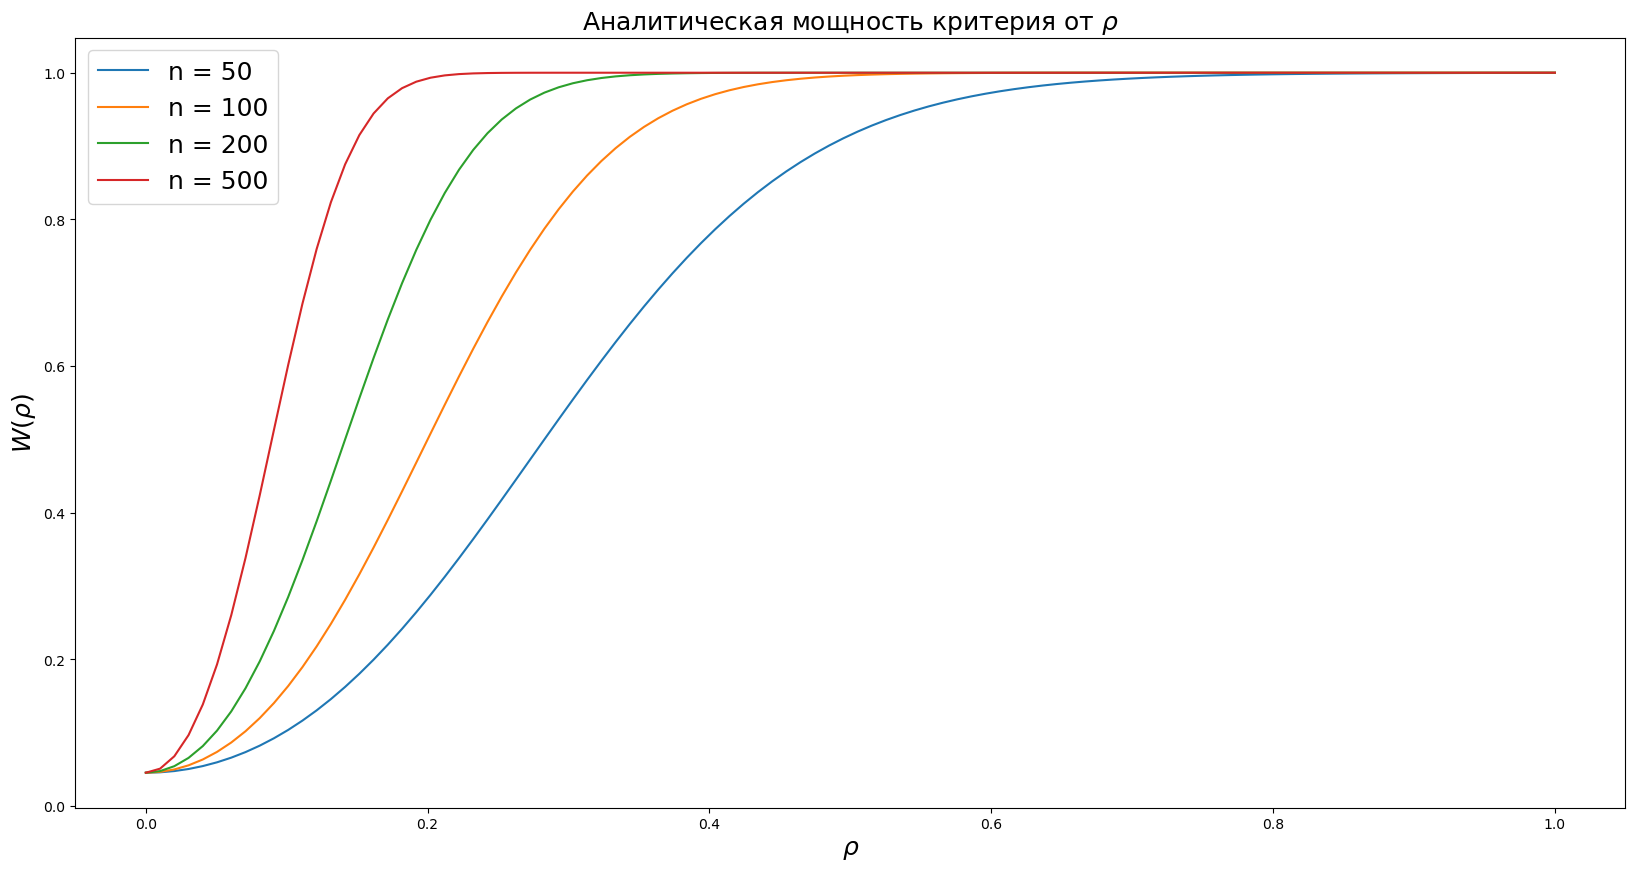

In [124]:
plt.figure(figsize = (20, 10))

rhos = np.linspace(0, 0.95, 100)

plt.plot(rhos, [analytical_power_1(50, rho) for rho in rhos], label = 'n = 50' )
plt.plot(rhos, [analytical_power_1(100, rho)  for rho in rhos], label = 'n = 100')
plt.plot(rhos, [analytical_power_1(200, rho) for rho in rhos], label = 'n = 200')
plt.plot(rhos, [analytical_power_1(500, rho) for rho in rhos], label = 'n = 500')

plt.title("Аналитическая мощность критерия от $\\rho$", fontsize = 18)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

4. Рассмотрим критерий: $T_2(\mathbf{Z}) = \frac{1}{2n} \sum\limits_{i = 1}^{n} (x_i - y_i)^2$

Посчитаем математическое ожидание и дисперсию $x_i - y_i$:

$$\mathbb{E}(x_i - y_i) = 0 = \mu$$

$$\mathbb{E}(x_i - y_i)^2 = \mathbb{E}(x_i)^2 + \mathbb{E}(y_i)^2 - 2 \mathbb{E}(x_i y_i) = 2(1 - \rho)$$

$$\mathbb{D}(x_i - y_i) = \mathbb{E}(x_i - y_i)^2 - \mathbb{E}^2(x_i - y_i) = 2(1 - \rho) = \sigma^2$$

Тогда:

$$ x_i - y_i \sim N(0, 2(1 - \rho)) $$

$$ \frac{x_i - y_i}{\sqrt{2(1 - \rho)}} \sim N(0, 1) \Rightarrow \frac{(x_i - y_i)^2}{2(1 - \rho)} \sim \chi^2(1) \Rightarrow T_2(\mathbf{Z}) = \frac{1 - \rho}{n} \xi,\ \text{где}\ \xi \sim \chi^2(n)$$

Нарисуем плотность:

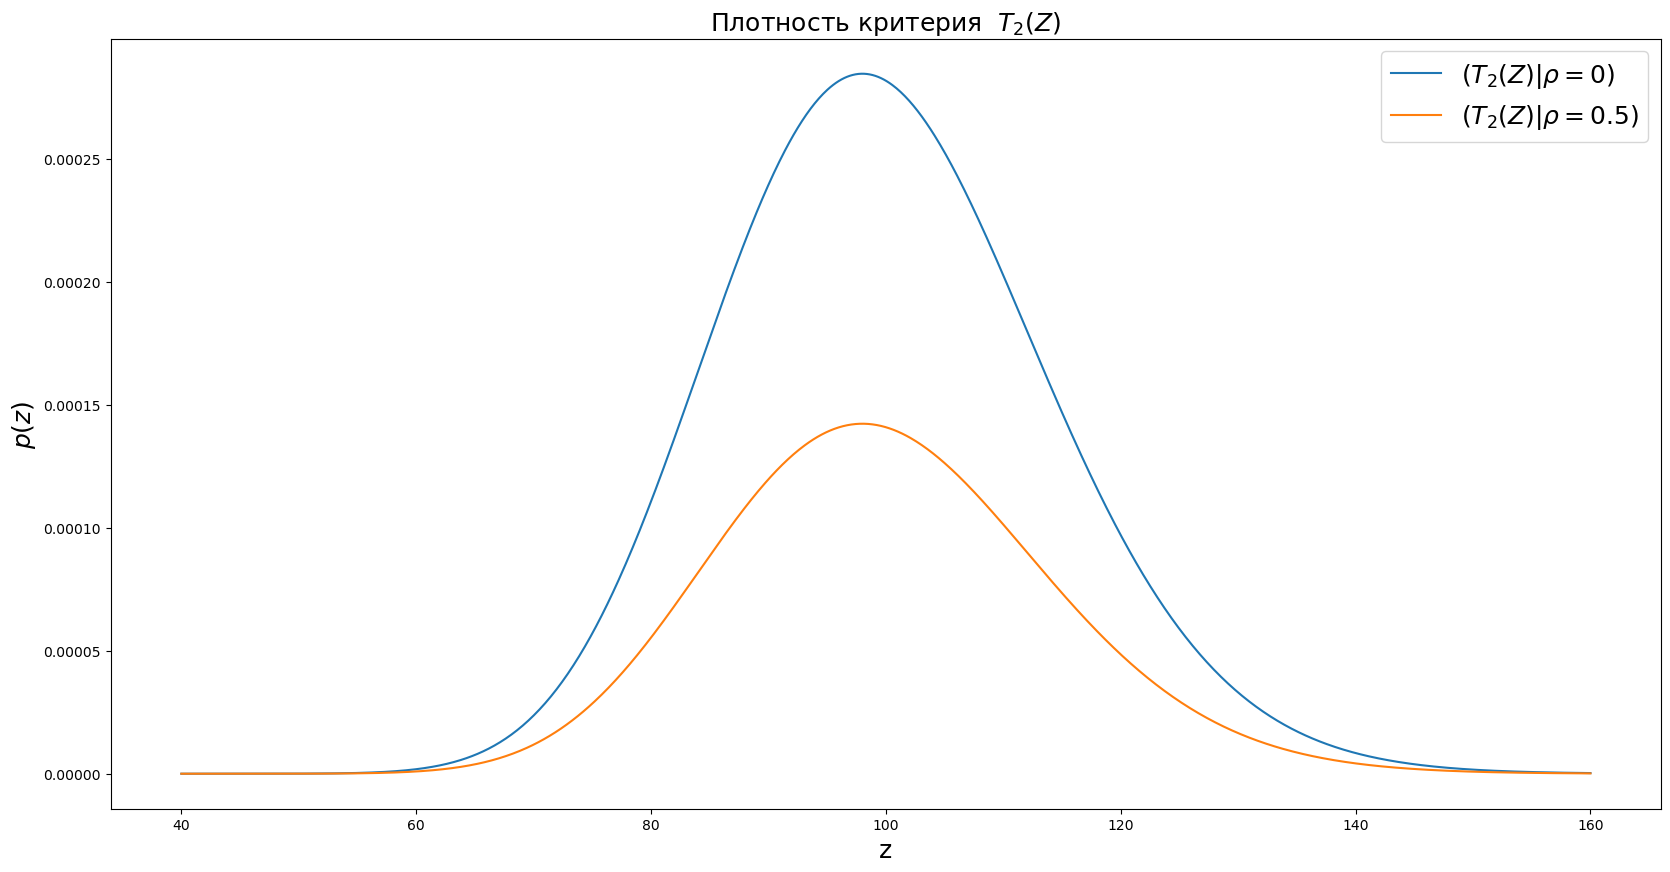

In [146]:
plt.figure(figsize = (20, 10))

steps = np.linspace(40, 160, 1000)

plt.plot(steps, 1 / 100 * stats.chi2.pdf(steps, 100), label = "$(T_2(Z)| \\rho = 0)$")
plt.plot(steps, 0.5 / 100 * stats.chi2.pdf(steps, 100), label = "$(T_2(Z)| \\rho = 0.5)$")

plt.title("Плотность критерия  $T_2(Z)$", fontsize = 18)
plt.xlabel("z", fontsize = 18)
plt.ylabel("$p(z)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Построим критерий:

В качестве критической области возьмем: $T_2(X) \leq \frac{t_{\alpha}^{(1)}}{n}$ или $\frac{t_{\alpha}^{(2)}}{n} \leq T_2(X)$, где $t_{\alpha}^{(1)} = \chi_{\frac{\alpha}{2}}^2(n)$, $t_{\alpha}^{(2)} = \chi_{1 - \frac{\alpha}{2}}^2(n)$.

Таким образом $H_0$ отвергается $\Leftrightarrow T_2(X) \leq \frac{t_{\alpha}^{(1)}}{n}$ или $\frac{t_{\alpha}^{(2)}}{n} \leq T_2(X)$, $t_{\alpha}^{(1)} = \chi_{\frac{\alpha}{2}}^2(n)$, $t_{\alpha}^{(2)} = \chi_{1 - \frac{\alpha}{2}}^2(n)$

3. Зависимость мощности критерия от истинного $\rho$ сэмплированием:

In [151]:
def sampling_power_2(N, n, rho):
    
    k = 0
    t_1 = stats.chi2(n).ppf(alpha/2)
    t_2 = stats.chi2(n).ppf(1 - alpha/2)
    for i in range(N):
        
        T = 1 / (2 * n) * np.sum([(x - y)**2 for x, y in 
                            np.random.multivariate_normal([0,0], [[1, rho], [rho, 1]], n)]) 
        
        if ((T <= t_1 / n) or (T >= t_2 / n)):
            k += 1

    return k / N

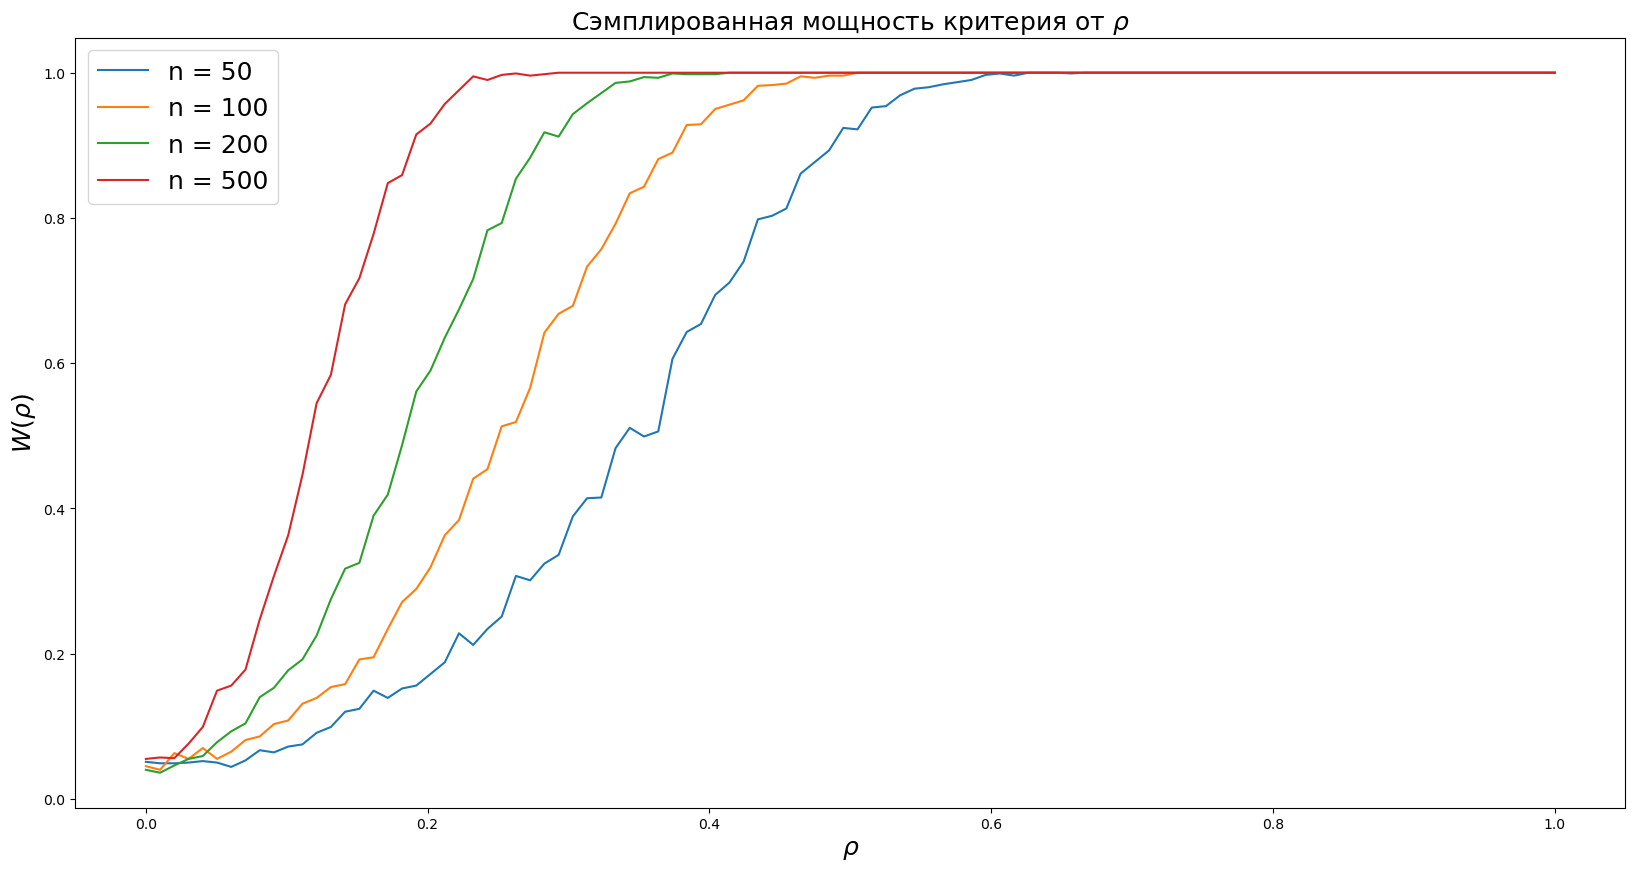

In [152]:
plt.figure(figsize = (20, 10))

rhos = np.linspace(0, 1, 100)

plt.plot(rhos, [sampling_power_2(1000, 50, rho) for rho in rhos], label = 'n = 50' )
plt.plot(rhos, [sampling_power_2(1000, 100, rho)  for rho in rhos], label = 'n = 100')
plt.plot(rhos, [sampling_power_2(1000, 200, rho) for rho in rhos], label = 'n = 200')
plt.plot(rhos, [sampling_power_2(1000, 500, rho) for rho in rhos], label = 'n = 500')

plt.title("Сэмплированная мощность критерия от $\\rho$", fontsize = 18)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Зависимость мощности критерия от истинного $\rho$ аналитически:

$$W(n) = \int\limits_{-\infty}^{t_{\alpha}^{(1)}} f_{T_2(\mathbf{Z})}(t) dt + \int\limits^{+\infty}_{t_{\alpha}^{(2)}} f_{T_2(\mathbf{Z})}(t) dt = F_{T_2(\mathbf{Z})} \left( t_{\alpha}^{(1)} \right) + 1 - F_{T_2(\mathbf{Z})} \left( t_{\alpha}^{(2)} \right)$$

С учетом того, что $F_{T_2(\mathbf{Z})}(z) = F_{\xi} \left( \dfrac{z}{1 - \rho} \right)$ получаем:

$$W(n, \rho) = F_{\xi} \left( \frac{t_{\alpha}^{(1)}}{1 - \rho} \right) + 1 - F_{\xi} \left( \frac{t_{\alpha}^{(2)}}{1 - \rho} \right)$$

In [153]:
def analytical_power_2(n, rho):
    xi = stats.chi2(n)
    return xi.cdf(xi.ppf(0.025) / (1 - rho)) + 1 - xi.cdf(xi.ppf(0.975) / (1 - rho))

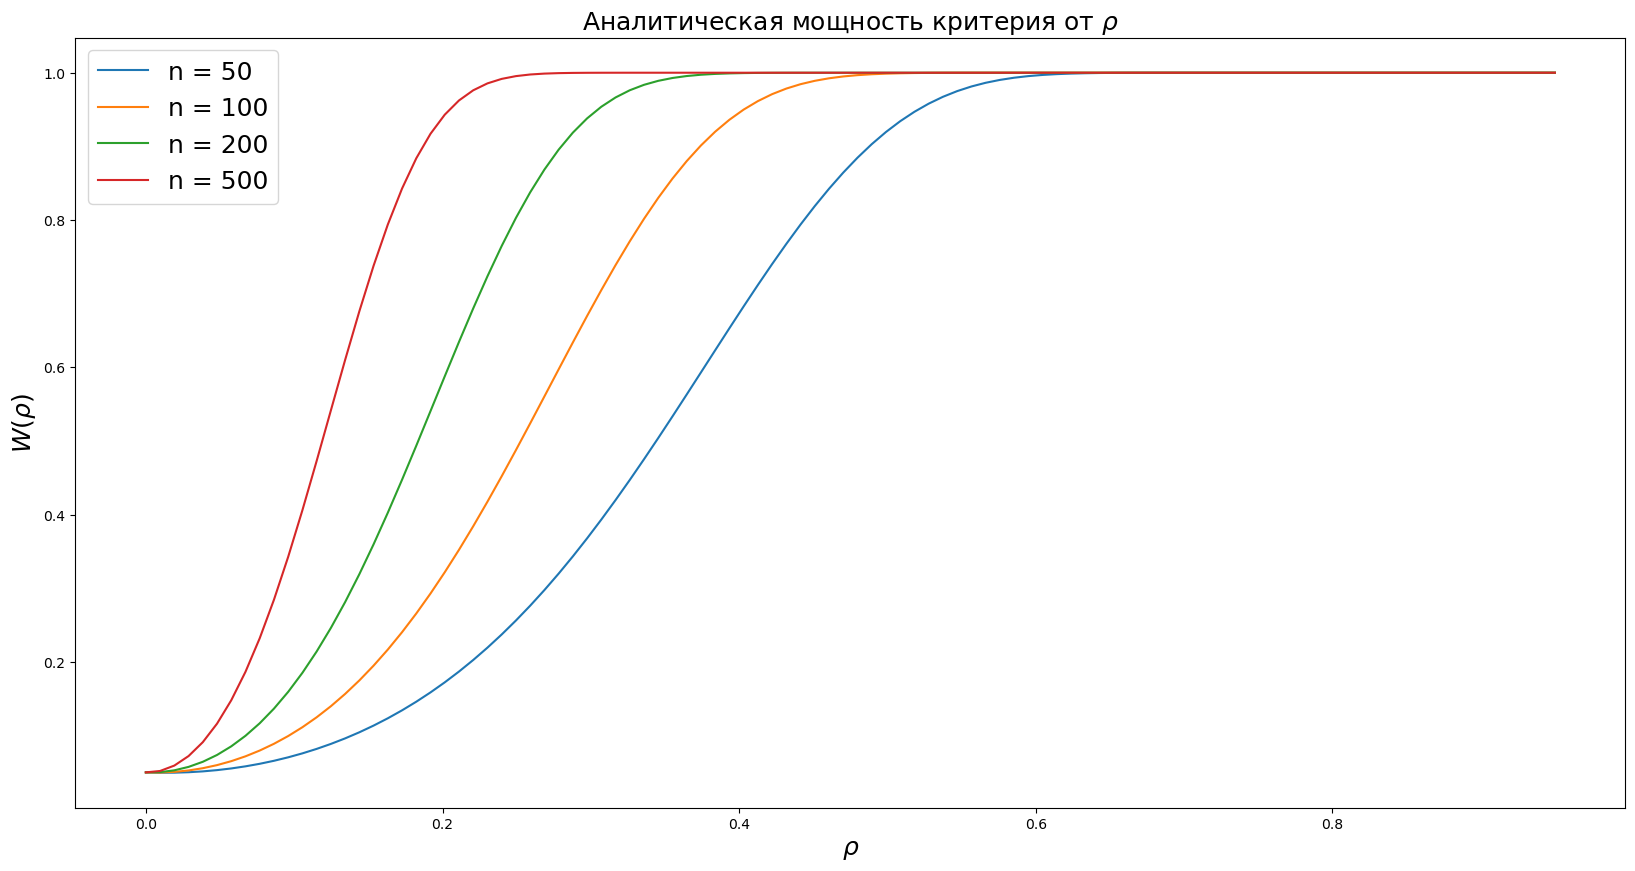

In [155]:
plt.figure(figsize = (20, 10))

rhos = np.linspace(0, 0.95, 100)

plt.plot(rhos, [analytical_power_2(50, rho) for rho in rhos], label = 'n = 50')
plt.plot(rhos, [analytical_power_2(100, rho)  for rho in rhos], label = 'n = 100')
plt.plot(rhos, [analytical_power_2(200, rho) for rho in rhos], label = 'n = 200')
plt.plot(rhos, [analytical_power_2(500, rho) for rho in rhos], label = 'n = 500')

plt.title("Аналитическая мощность критерия от $\\rho$", fontsize = 18)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Сравним между собой критерии:

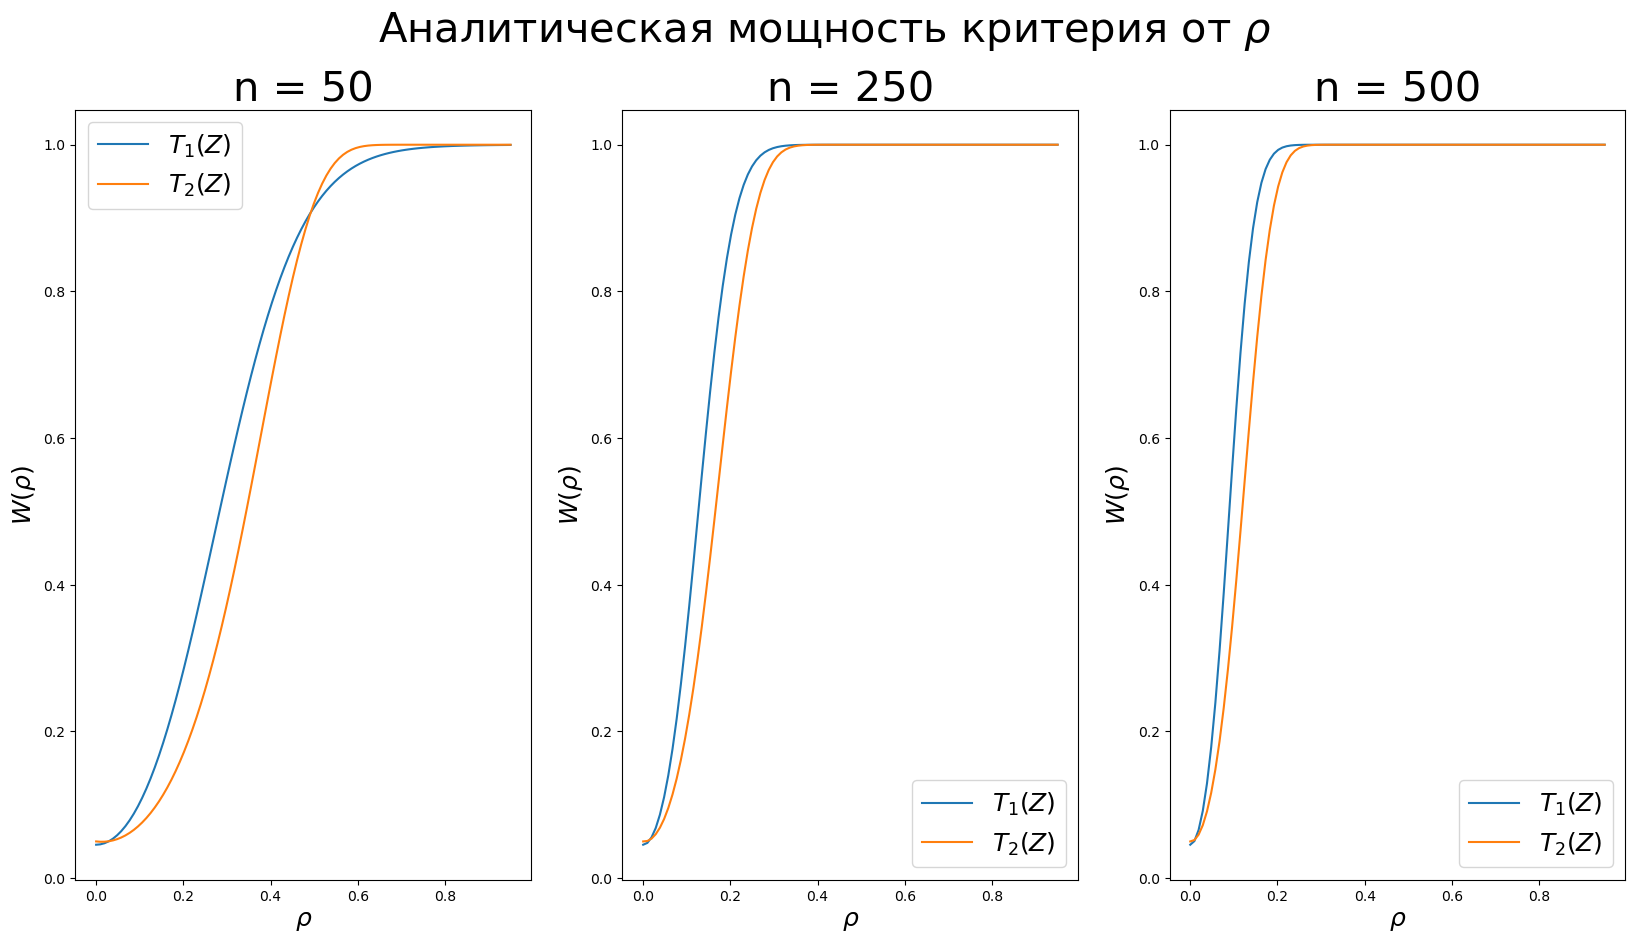

In [159]:
plt.figure(figsize=(20, 10))

rhos = np.linspace(0, 0.95, 100)

plt.subplot(1, 3, 1)
plt.plot(rhos, [analytical_power_1(50, rho) for rho in rhos], label = "$T_1(Z)$")
plt.plot(rhos, [analytical_power_2(50, rho) for rho in rhos], label = "$T_2(Z)$")
plt.title("n = 50", fontsize=30)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.subplot(1, 3, 2)
plt.plot(rhos, [analytical_power_1(250, rho) for rho in rhos], label = "$T_1(Z)$")
plt.plot(rhos, [analytical_power_2(250, rho) for rho in rhos], label = "$T_2(Z)$")
plt.title("n = 250", fontsize=30)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.subplot(1, 3, 3)
plt.plot(rhos, [analytical_power_1(500, rho) for rho in rhos], label = "$T_1(Z)$")
plt.plot(rhos, [analytical_power_2(500, rho) for rho in rhos], label = "$T_2(Z)$")
plt.title("n = 500", fontsize=30)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$W(\\rho)$", fontsize = 18)
plt.legend(fontsize = 18)

plt.suptitle("Аналитическая мощность критерия от $\\rho$", fontsize=30)

plt.show()

$\textbf{Вывод}:$

$T_1(\mathbf{Z})$ лучше, чем $T_2(\mathbf{Z})$.

$\textbf{Задача 4 (15 баллов).}$ Пусть $\mathbf{x} = \{ x_1, \dots, x_n \}$, $n = 12$ есть НОР выборка из $N(0, 1)$. Пусть $\mathbf{y} = \{ y_1, \dots, y_n \}$, $n = 12$ есть НОР выборка из $N(0, 1)$, независимая от $\{ x_1, \dots, x_n \}$. Оценить (сэмплированием или приближенно аналитически), сколько разных (и независимых) выборок $\mathbf{y}$ нужно рассмотреть $K$, чтобы найти ту, которая дает выборочную корреляцию с $\mathbf{x}$ не менее $\rho = 0.97$ (5 баллов). Построить график зависимости $K(\rho)$ в диапазоне от 0 до 0.99 (5 баллов). Какой прикладной вывод можно сделать из этого эксперимента помимо известного «корреляция не означает причинность» (5 баллов)?

$\textbf{Решение:}$

Найдем $\mathbb{E}K$:

$$\mathbb{E}K = \sum\limits_{k = 1}^{\infty} k \mathbb{P} \{ K = k\}$$

$$\mathbb{P} \{ K = k\} = \mathbb{P} \{r_1 < \rho, r_2 < \rho, \dots, r_{k - 1} < \rho, r_k \geq \rho \},\ \text{где}\ r_i - \ \text{выборочные коэффициенты корреляции.}$$

Так как $y_i$ - независимые, то:

$$\mathbb{P} \{ K = k\} = \mathbb{P}^{k - 1} \{r < \rho \} (1 - \mathbb{P} \{r < \rho \}) = F_r^{k - 1} (\rho) (1 - F_r (\rho))$$

Тогда:

$$\mathbb{E}K = (1 - F_r (\rho)) \sum\limits_{k = 1}^{\infty} k F_r^{k - 1} (\rho) = (1 - F_r (\rho)) \left( \sum\limits_{k = 0}^{\infty} F_r^{k} (\rho) \right)'_{F_r (\rho)} = \frac{(1 - F_r (\rho))}{(1 - F_r (\rho))^2} = \frac{1}{1 - F_r (\rho)}$$

Заметим, что:

$$t_{n - 2} = \frac{r}{\sigma} = r \sqrt{\frac{n - 2}{1 - r^2}} \sim t(n - 2)$$

Тогда:

$$r = \frac{t_{n - 2}}{\sqrt{t_{n - 2}^2 + n - 2}}$$

$$r < \rho \Rightarrow \frac{t_{n - 2}}{\sqrt{t_{n - 2}^2 + n - 2}} < \rho \Rightarrow t_{n - 2} < \rho \sqrt{\frac{n - 2}{1 - \rho^2}}$$

То есть:

$$\mathbb{E}K = \frac{1}{1 - F_{t_{n - 2}} \left( \rho \sqrt{\frac{n - 2}{1 - \rho^2}} \right)}$$

In [164]:
def K(rho):
    return 1 / (1 - stats.t(df=10).cdf(rho * np.sqrt( 10 / (1 - rho**2) )))

In [181]:
print(f"Необходиоме количество выборок: {int(K(0.97))}")

Необходиоме количество выборок: 10990382


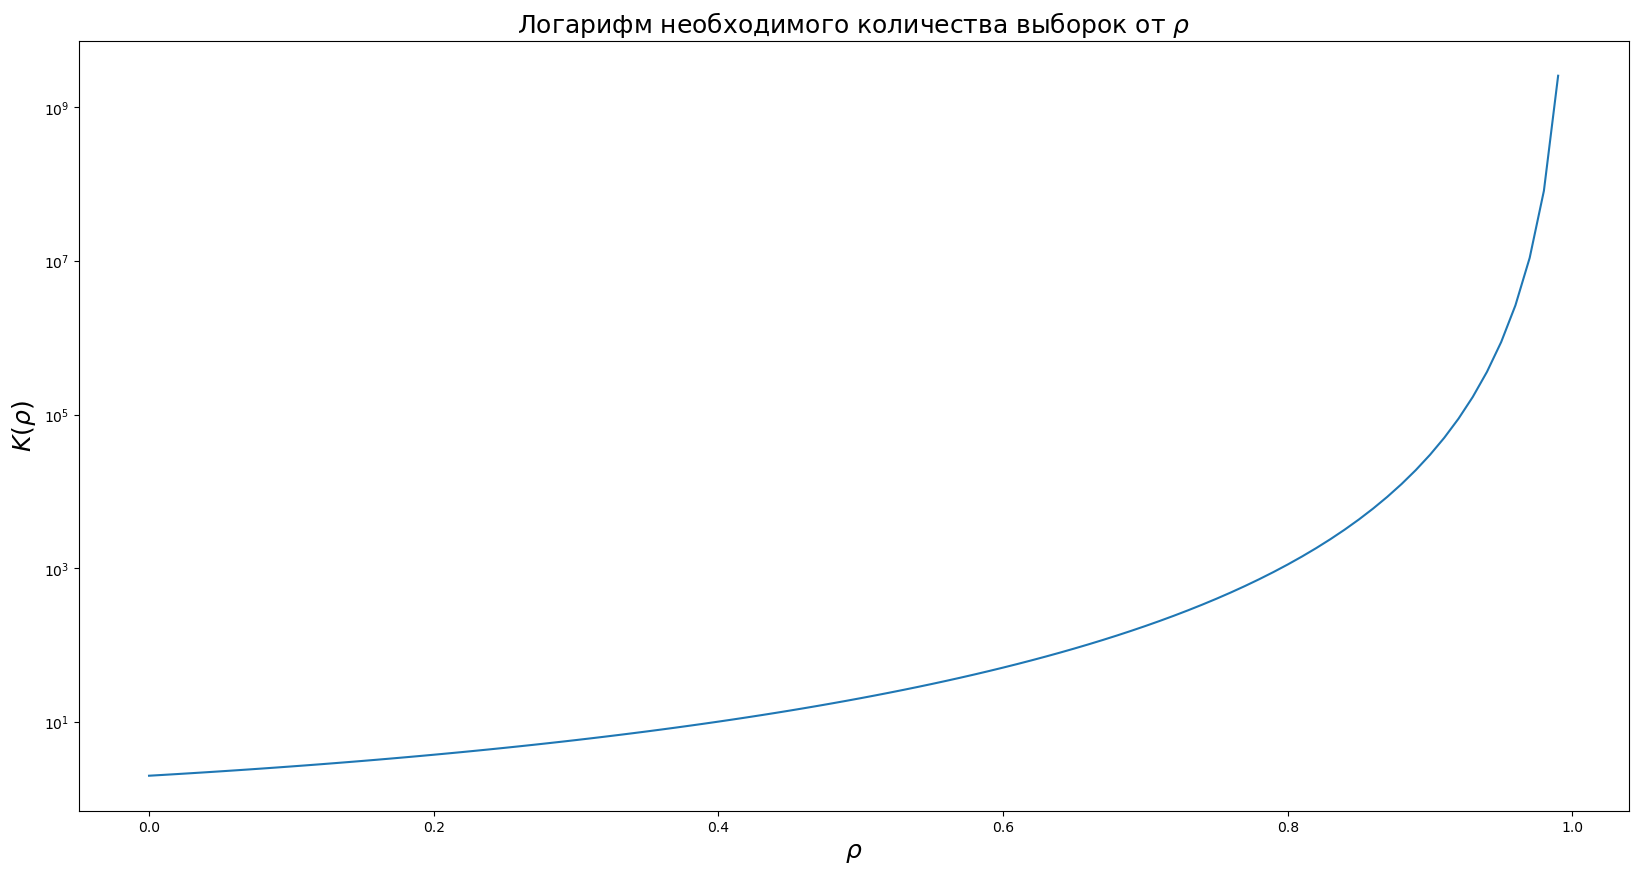

In [189]:
plt.figure(figsize = (20, 10))

rhos = np.linspace(0, 0.99, 100)

plt.plot(rhos, [K(rho) for rho in rhos])

plt.title("Логарифм необходимого количества выборок от $\\rho$", fontsize = 18)
plt.xlabel("$\\rho$", fontsize = 18)
plt.ylabel("$K(\\rho)$", fontsize = 18)
plt.yscale('log')

plt.show()

$\textbf{Вывод}:$ В реальных задачах, когда данных ограниченное количество, вероятность того, что две независимые величины будут сильно скоррелированны, очень мала. Поэтому если мы видим, что два признака сильно скоррелированны, то скорее всего эти признаки действительно связаны.

$\textbf{Задача 5 (5 баллов).}$ Привести пример, когда наивный байесовский классификатор классифицирует объекты не лучше, чем наугад, хотя генеральная совокупность (все возможные объекты) идеально разделима?

$\textbf{Решение:}$

Пусть имеется два класса $C_1$, $C_2$ и $\mathbf{x} \in \mathbb{R}^2$. Тогда наивный байессовский классификатор:

$$f(\mathbf{x}) = \arg \max_{k \in \overline{1, 2}} \left( \mathbb{P}\{C_k\} \prod_{i = 1}^{2} p(x_i | C_k) \right)$$

Пусть $\mathbb{P}\{C_1\} = \mathbb{P}\{C_2\} = \frac{1}{2}$. А также:

$$ p(\mathbf{x}|C_1) = N \left( (0, 0)^\top, \begin{pmatrix} 1 & 1 \\ 
                                                             1 & 1
                                             \end{pmatrix}
                                                                    \right), \quad 
   p(\mathbf{x}|C_2) = N \left( (0, 0)^\top, \begin{pmatrix} 1 & 0 \\ 
                                                             0 & 1
                                             \end{pmatrix}
                                                                    \right)$$

Посмотрим на распределение точек:

In [272]:
points_1 = np.random.multivariate_normal([0,0], [[1, 1], [1, 1]], 1000)
points_1 = points_1.T
x_1 = points_1[0]
y_1 = points_1[1]

points_2 = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 1000)
points_2 = points_2.T
x_2 = points_2[0]
y_2 = points_2[1]

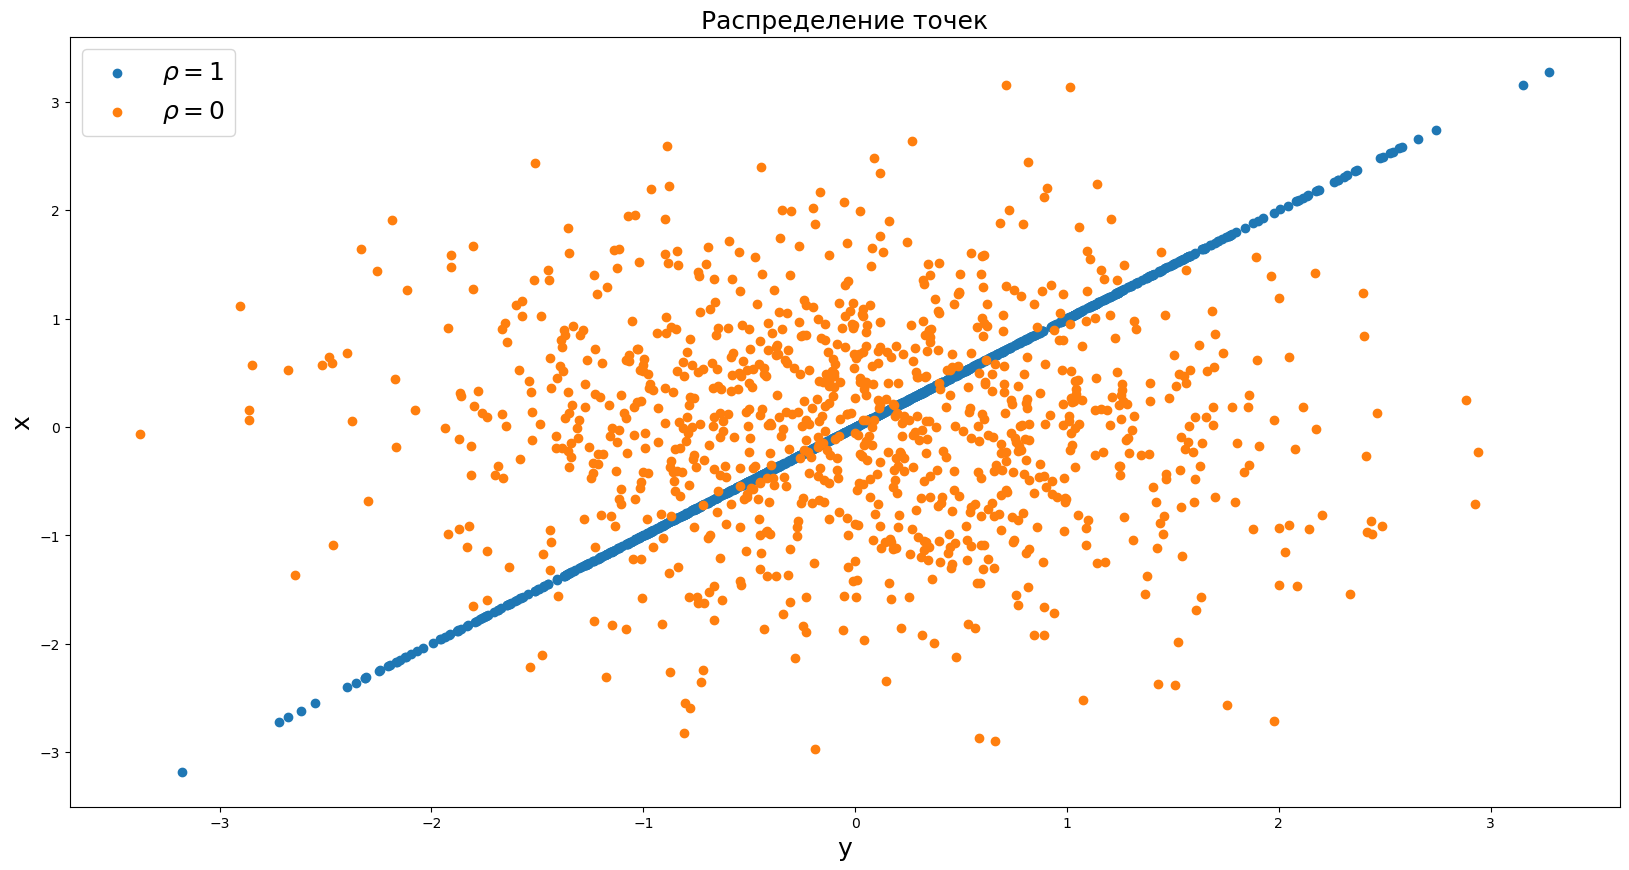

In [275]:
plt.figure(figsize = (20, 10))

plt.scatter(x_1, y_1, label = "$\\rho = 1$")
plt.scatter(x_2, y_2, label = "$\\rho = 0$")

plt.title("Распределение точек", fontsize = 18)
plt.xlabel("y", fontsize = 18)
plt.ylabel("x", fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Точки $C_1$ лежат на прямой $x_1 = x_2$, а точки $C_2$ лежат просто на плоскости. $C_1$ и $C_2$ идельно разделимы, так как, если $x_1 = x_2$, то точка с вероятность 1 принадлежит $C_1$, а если $x_1 \not = x_2$, то с вероятностью 1 принадлежит $C_2$. Но наивный байессовский классификатор будет выглядеть так:

$$f(\mathbf{x}) = \arg \max_{k \in \overline{1, 2}} \left( \mathbb{P}\{C_k\} \prod_{i = 1}^{2} p(x_i | C_k) \right) = \arg \max_{k \in \overline{1, 2}} \left( \frac{1}{2} p_{N(0, 1)}^2(x) \right)$$

Как мы видим, выражение под $\arg \max$ не зависит от $k$, поэтому классификатор будет выдавать случайный класс.

$\textbf{Задача 6 (15 баллов).}$ В условиях задачи 3 при $n = 100$ сэмплировать $m = 1000$ выборок пар $\mathbf{z_i}, i = \overline{1, \dots, m}$, для 500 из которых $\rho = 0$ и $\rho = 0.2$ для оставшихся. С помощью одной из рассмотренных (или своей) статистик получить достигаемые уровни значимости $p_1, \dots , p_m$. Для уровня значимости $\alpha = 0.05$ сравнить результаты применения отсутствия поправки на множественное тестирование, поправки Бонферрони и поправки Бенджамини-Хохберга в терминах получения ложных открытий (ложно отклоненные гипотезы) или пропуска таковых (ложно принятые гипотезы). Контролирует ли поправка Бенджамини-Хохберга FDR на уровне $\alpha$ и почему? (8 баллов)

Рассмотреть отдельно 1000 выборок для $\rho = 0$ и повторить эксперимент. Cравнить результаты применения отсутствия поправки на множественное тестирование, поправки Бонферрони и поправки Бенджамини-Хохберга в терминах получения ложных открытий (ложно отклоненные гипотезы) или пропуска таковых (ложно принятые гипотезы). Контролирует ли поправка Бенджамини-Хохберга FDR на уровне $\alpha$ и почему? (7 баллов)

$\textbf{Решение:}$

Будем пользоваться статистикой: $T(\mathbf{Z}) = \frac{1}{n} \sum\limits_{i = 1}^{n} x_i y_i$.

In [283]:
def p_value_1(m, n):
    
    p_values = []
    indexes = random.sample(range(m), 500)
    
    for i in range(m):
        
        rho = 0 if i in indexes else 0.2
        T = 1 / n * np.sum([x * y for x, y in 
                            np.random.multivariate_normal([0,0], [[1, rho], [rho, 1]], n)])
        
        xi = stats.norm(0, np.sqrt(1 / n))
        p_value = xi.cdf(-abs(T)) + 1 - xi.cdf(abs(T))
        p_values.append(p_value)

    return np.array(indexes), np.array(p_values)

In [284]:
def list_reject(p_values):
    return np.array(p_values < 0.05)

In [285]:
def results(indexes, reject):
    
    V = 0;
    T = 0;
    
    for i in range(len(reject)):
        if (i in indexes) and (reject[i]):
            V += 1
        elif (i not in indexes) and (not reject[i]):
            T += 1

    if np.sum(reject) > 0:
        FDR = V / np.sum(reject)
    else:
        FDR = 0
    
    return V, T, FDR

In [286]:
indexes, p_values = p_value_1(1000, 100)

In [287]:
reject = list_reject(p_values)

In [288]:
Bonferoni_p_values = np.array(1000 * p_values)
Bonferoni_p_values = Bonferoni_p_values * np.array(Bonferoni_p_values < 1)
Bonferoni_p_values[np.where(Bonferoni_p_values == 0)] = 1

In [289]:
Bonferoni_reject = list_reject(Bonferoni_p_values)

In [290]:
Bengamini_p_values = []
for i in range(len(p_values)):
    if (i in indexes):
        Bengamini_p_values.append([p_values[i], 1])
    else:
        Bengamini_p_values.append([p_values[i], 0])

Bengamini_p_values.sort(key = lambda x: x[0])
Bengamini_p_values_new = []
indexes_new = []
for i in range(len(Bengamini_p_values)):
    Bengamini_p_values_new.append(Bengamini_p_values[i][0])
    if Bengamini_p_values[i][1] == 1:
        indexes_new.append(i)

Bengamini_p_values = np.array(Bengamini_p_values_new)

Bengamini_p_values[999] = min(1, Bengamini_p_values[999])

for i in range(1, 1000):
    Bengamini_p_values[999 - i] = min(1, 1000 / (1000 - i) * Bengamini_p_values[999 - i], 
                                                             Bengamini_p_values[1000 - i])

In [291]:
Bengamini_reject = list_reject(Bengamini_p_values)

In [292]:
print('Ложно отклоненные')
print('Без поправки:', results(indexes, reject)[0])
print('Бонферони:', results(indexes, Bonferoni_reject)[0])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[0])

print('\n')

print('Ложно принятые')
print('Без поправки:', results(indexes, reject)[1])
print('Бонферони:', results(indexes, Bonferoni_reject)[1])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[1])

Ложно отклоненные
Без поправки: 27
Бонферони: 0
Бенджамини-Хохберг: 4


Ложно принятые
Без поправки: 242
Бонферони: 492
Бенджамини-Хохберг: 369


In [294]:
print(f"FDR для поправки Бенджамини-Хохберг: {results(indexes_new, Bengamini_reject)[2]:.3f}")

FDR для поправки Бенджамини-Хохберг: 0.030


In [295]:
def p_value_2(m, n):
    
    p_values = []
    indexes = random.sample(range(m), 1000)
    
    for i in range(m):
        
        T = 1 / n * np.sum([x * y for x, y in 
                            np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], n)])
        
        xi = stats.norm(0, np.sqrt(1 / n))
        p_value = xi.cdf(-abs(T)) + 1 - xi.cdf(abs(T))
        p_values.append(p_value)

    return np.array(indexes), np.array(p_values)

In [296]:
indexes, p_values = p_value_2(1000, 100)

In [297]:
reject = list_reject(p_values)

In [298]:
Bonferoni_p_values = np.array(1000 * p_values)
Bonferoni_p_values = Bonferoni_p_values * np.array(Bonferoni_p_values < 1)
Bonferoni_p_values[np.where(Bonferoni_p_values == 0)] = 1

In [299]:
Bonferoni_reject = list_reject(Bonferoni_p_values)

In [300]:
Bengamini_p_values = []
for i in range(len(p_values)):
    if (i in indexes):
        Bengamini_p_values.append([p_values[i], 1])
    else:
        Bengamini_p_values.append([p_values[i], 0])

Bengamini_p_values.sort(key = lambda x: x[0])
Bengamini_p_values_new = []
indexes_new = []
for i in range(len(Bengamini_p_values)):
    Bengamini_p_values_new.append(Bengamini_p_values[i][0])
    if Bengamini_p_values[i][1] == 1:
        indexes_new.append(i)

Bengamini_p_values = np.array(Bengamini_p_values_new)

Bengamini_p_values[999] = min(1, Bengamini_p_values[999])

for i in range(1, 1000):
    Bengamini_p_values[999 - i] = min(1, 1000 / (1000 - i) * Bengamini_p_values[999 - i], 
                                                             Bengamini_p_values[1000 - i])

In [301]:
Bengamini_reject = list_reject(Bengamini_p_values)

In [303]:
print('Ложно отклоненные')
print('Без поправки:', results(indexes, reject)[0])
print('Бонферони:', results(indexes, Bonferoni_reject)[0])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[0])

print('\n')

print('Ложно принятые')
print('Без поправки:', results(indexes_new, reject)[1])
print('Бонферони:', results(indexes, Bonferoni_reject)[1])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[1])

Ложно отклоненные
Без поправки: 52
Бонферони: 0
Бенджамини-Хохберг: 0


Ложно принятые
Без поправки: 0
Бонферони: 0
Бенджамини-Хохберг: 0


In [304]:
print(f"FDR для поправки Бенджамини-Хохберг: {results(indexes_new, Bengamini_reject)[2]:.3f}")

FDR для поправки Бенджамини-Хохберг: 0.000


$\textbf{Вывод}:$ Поправка Бенджамини-Хохберга контролирует $FDR$ на уровне $\alpha = 0.05$, так-как выборки независимы.

$\textbf{Задача 7 (10 баллов)}$. В условиях задачи 6 сэмплировать $m = 1000$ выборок пар, но с $\rho_m$, зависящим от номера выборки. Провести те же исследования, что и в задаче 6.

$$ \rho_1 = 0, \quad \rho_i = \begin{cases} 
                                            \rho_{i - 1},\ \text{с вероятностью 0.3,}\\
                                             0.2 - \rho_{i - 1},\ \text{с вероятностью 0.7}.
                              \end{cases} $$

$\textbf{Решение:}$

Будем пользоваться статистикой: $T(\mathbf{Z}) = \frac{1}{n} \sum\limits_{i = 1}^{n} x_i y_i$.

In [335]:
def p_value_3(m, n):
    
    rhos = [0]
    for i in range(1, m):
        if np.random.binomial(1, 0.7) == 0:
            rhos.append(rhos[i - 1])
        else:
            rhos.append(0.2 - rhos[i - 1])

    indexes = list(set(range(len(rhos))) - set(np.nonzero(rhos)[0]))
    
    p_values = []
    
    for i in range(m):
        
        rho = 0 if i in indexes else 0.2
        T = 1 / n * np.sum([x * y for x, y in 
                            np.random.multivariate_normal([0,0], [[1, rho], [rho, 1]], n)])
        
        xi = stats.norm(0, np.sqrt(1 / n))
        p_value = xi.cdf(-abs(T)) + 1 - xi.cdf(abs(T))
        p_values.append(p_value)

    return np.array(indexes), np.array(p_values)

In [336]:
indexes, p_values = p_value_1(1000, 100)

In [337]:
reject = list_reject(p_values)

In [338]:
Bonferoni_p_values = np.array(1000 * p_values)
Bonferoni_p_values = Bonferoni_p_values * np.array(Bonferoni_p_values < 1)
Bonferoni_p_values[np.where(Bonferoni_p_values == 0)] = 1000

In [339]:
Bonferoni_reject = list_reject(Bonferoni_p_values)

In [328]:
Bengamini_p_values = []
for i in range(len(p_values)):
    if (i in indexes):
        Bengamini_p_values.append([p_values[i], 1])
    else:
        Bengamini_p_values.append([p_values[i], 0])

Bengamini_p_values.sort(key = lambda x: x[0])
Bengamini_p_values_new = []
indexes_new = []
for i in range(len(Bengamini_p_values)):
    Bengamini_p_values_new.append(Bengamini_p_values[i][0])
    if Bengamini_p_values[i][1] == 1:
        indexes_new.append(i)

Bengamini_p_values = np.array(Bengamini_p_values_new)

Bengamini_p_values[999] = min(1, Bengamini_p_values[999])

for i in range(1, 1000):
    Bengamini_p_values[999 - i] = min(1, 1000 / (1000 - i) * Bengamini_p_values[999 - i], 
                                                             Bengamini_p_values[1000 - i])

In [329]:
Bengamini_reject = list_reject(Bengamini_p_values)

In [340]:
print('Ложно отклоненные')
print('Без поправки:', results(indexes, reject)[0])
print('Бонферони:', results(indexes, Bonferoni_reject)[0])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[0])

print('\n')

print('Ложно принятые')
print('Без поправки:', results(indexes_new, reject)[1])
print('Бонферони:', results(indexes, Bonferoni_reject)[1])
print('Бенджамини-Хохберг:', results(indexes_new, Bengamini_reject)[1])

Ложно отклоненные
Без поправки: 20
Бонферони: 0
Бенджамини-Хохберг: 1


Ложно принятые
Без поправки: 357
Бонферони: 483
Бенджамини-Хохберг: 409


$\textbf{Вывод}:$ Поправка Бенджамини-Хохберга контролирует $FDR$ на уровне $\alpha = 0.05$, но теперь у нас нет независимости.